In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

df=pd.read_csv("BostonHousing.csv")
print(df.head())


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [151]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


In [171]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [173]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [157]:
df['chas'] = df['chas'].astype('category')

In [161]:
print(df.dtypes)

crim        float64
zn          float64
indus       float64
chas       category
nox         float64
rm          float64
age         float64
dis         float64
rad           int64
tax           int64
ptratio     float64
b           float64
lstat       float64
medv        float64
dtype: object


In [177]:
X = df.drop(columns='medv',axis=1).values
y = df['medv'].values

In [179]:
X_rooms = X[:, 5]
X_rooms.shape

(506,)

In [181]:
X_rooms = X_rooms.reshape(-1,1)

In [183]:
X_rooms.shape

(506, 1)

In [232]:
df.fillna(df.median(),inplace=True)

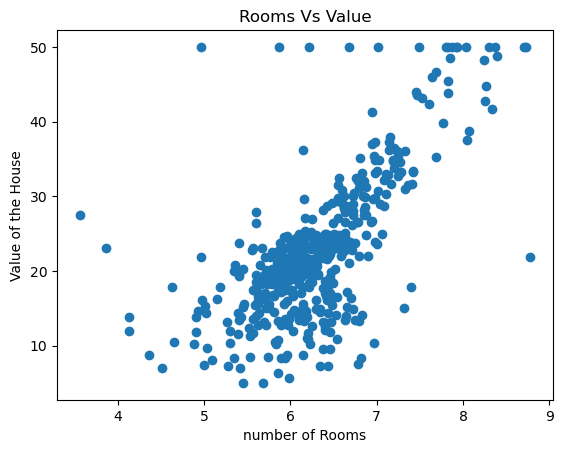

In [234]:
plt.scatter(X_rooms,y)
plt.title('Rooms Vs Value')
plt.xlabel('number of Rooms')
plt.ylabel('Value of the House')
plt.show()

In [236]:
print("Duplicates:" , df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicates: 0


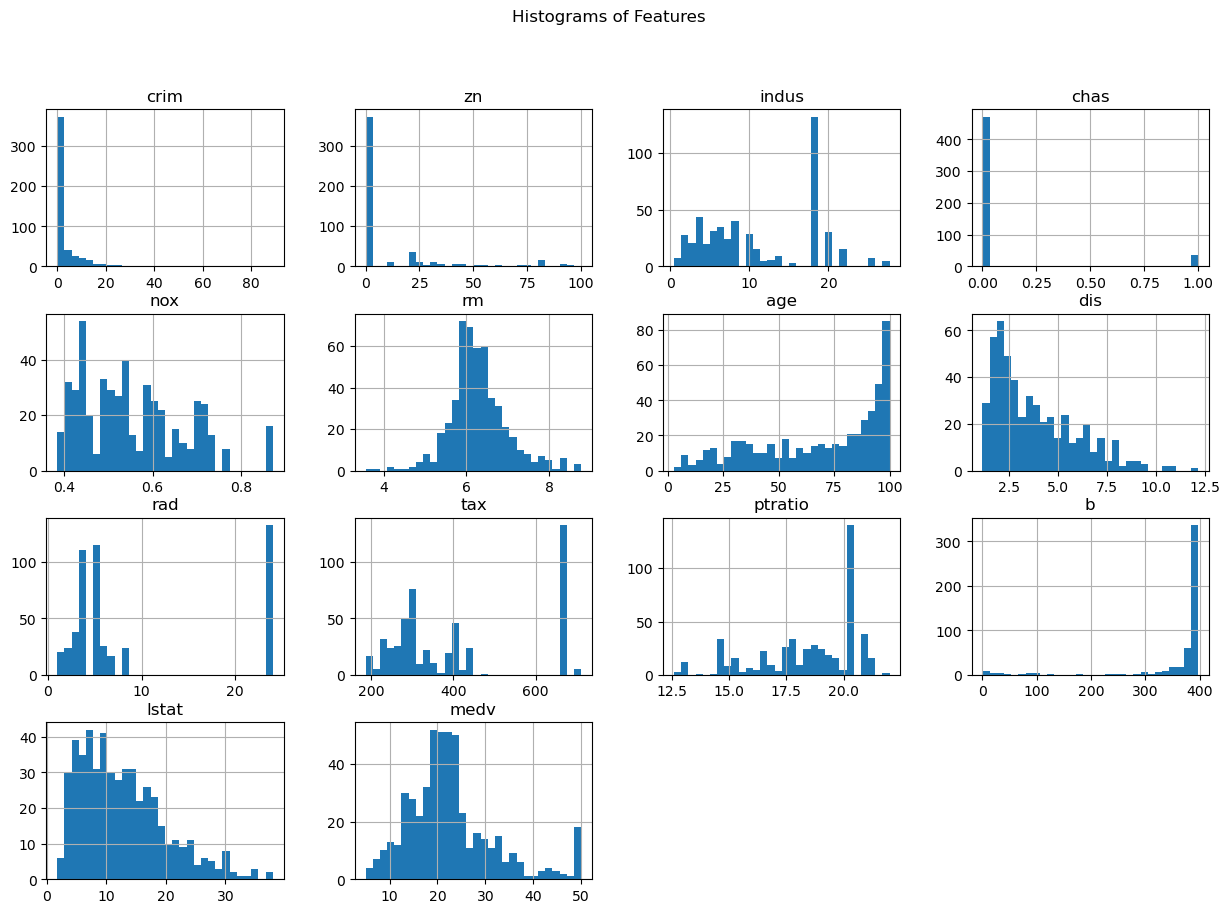

In [238]:
df.hist(bins=30, figsize =(15,10))
plt.suptitle("Histograms of Features")
plt.show()

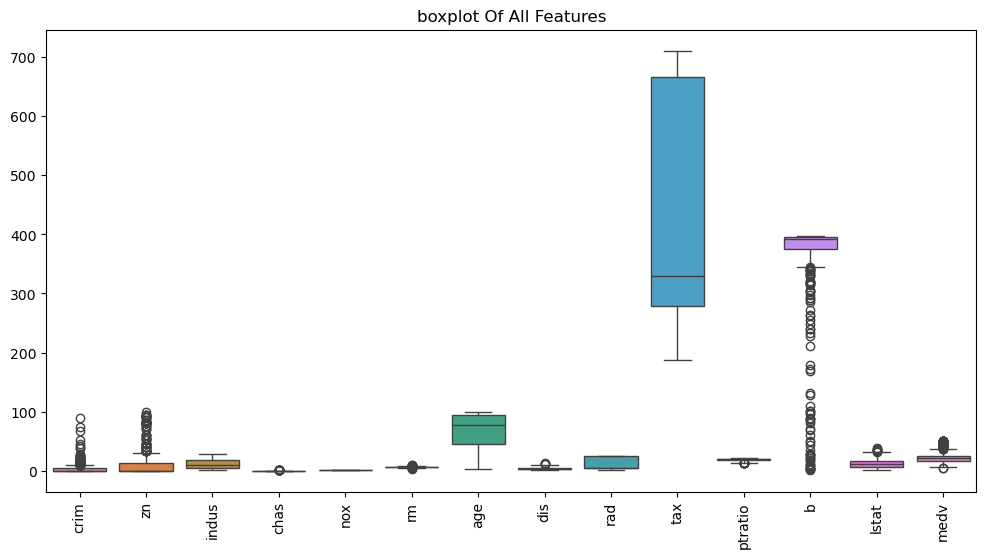

In [240]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("boxplot Of All Features")
plt.show()

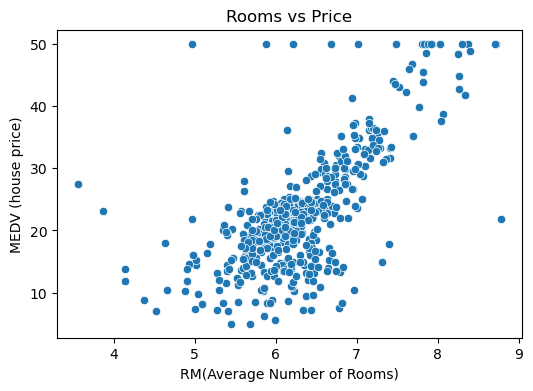

In [242]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='rm',y='medv',data=df)
plt.title("Rooms vs Price")
plt.xlabel("RM(Average Number of Rooms)")
plt.ylabel("MEDV (house price)")
plt.show()

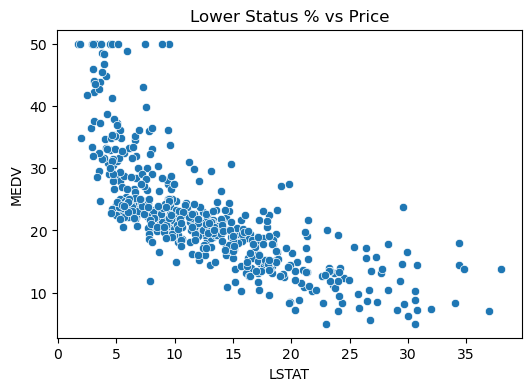

In [244]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='lstat', y='medv', data=df)
plt.title("Lower Status % vs Price")
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.show()

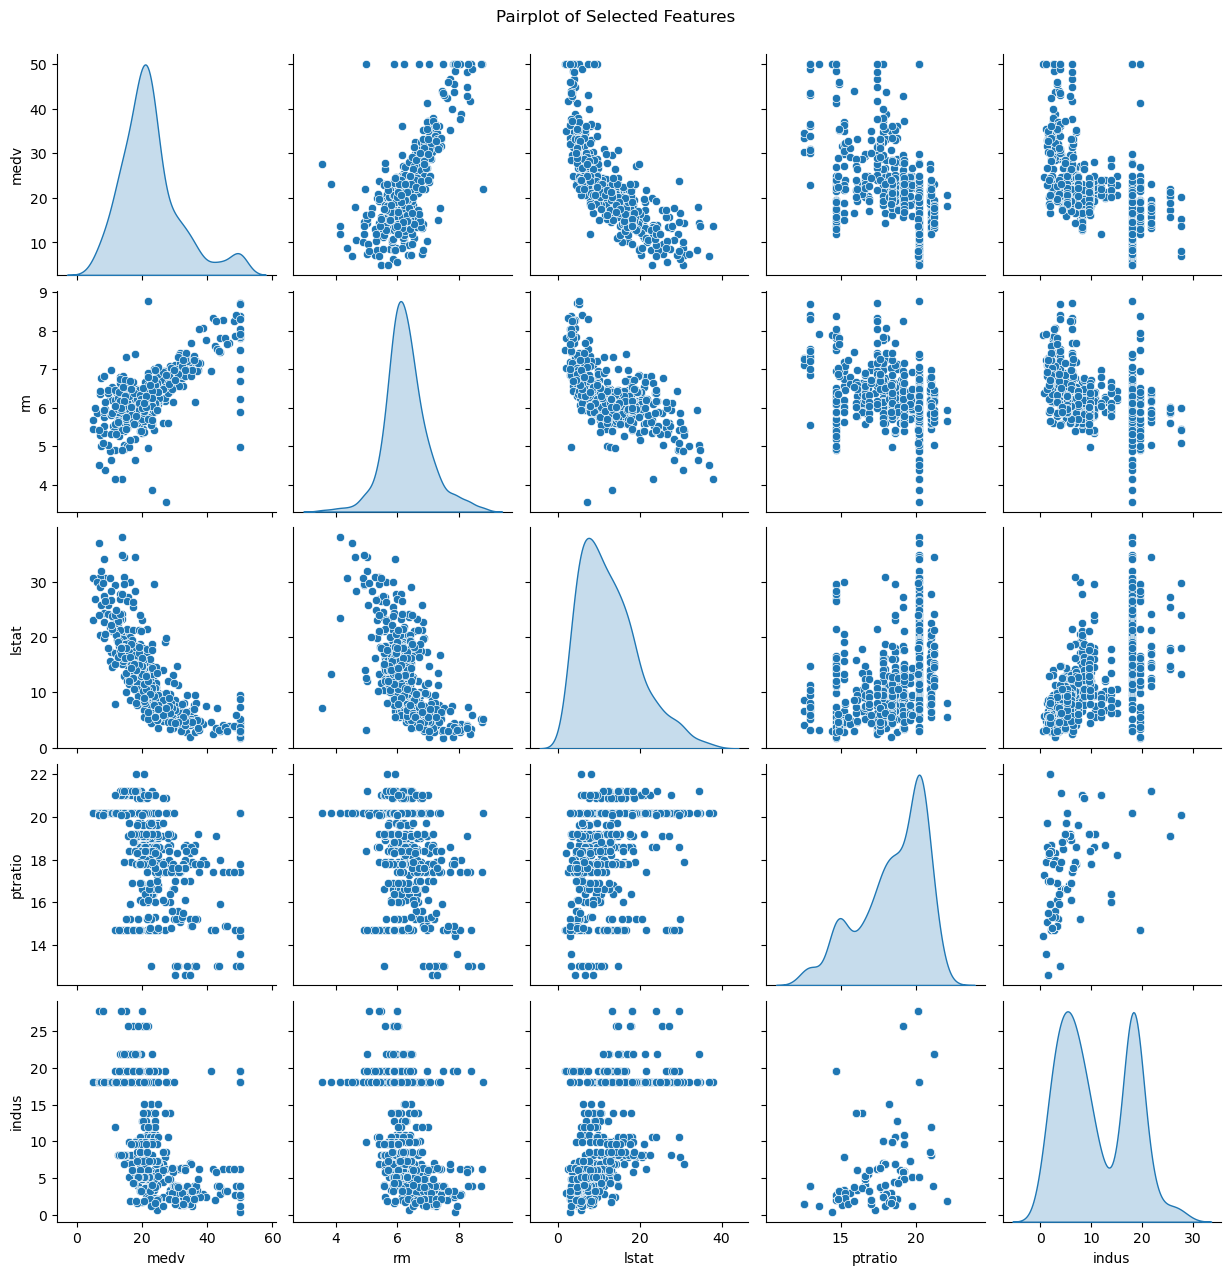

In [246]:
key_features = ['medv', 'rm', 'lstat', 'ptratio', 'indus']
sns.pairplot(df[key_features], diag_kind='kde')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

In [247]:
X = df.drop("medv", axis = 1)
y = df["medv"]

In [248]:
scaler = StandardScaler()
X_scaled =scaler.fit_transform(X)

In [249]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2,random_state=42)

In [260]:
model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print("RMSE:",mean_squared_error(y_test,y_pred,squared = False))
print("R^2 Score",r2_score(y_test,y_pred))

RMSE: 4.945360766355319
R^2 Score 0.666503048725316


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [262]:
# helps understand how each feature influences the price
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


feature_names = df.drop("medv", axis=1).columns
coeff_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": model.coef_
})
print(coeff_df)

Intercept: 22.480293047202533
Coefficients: [-0.97165763  0.70085174  0.2860928   0.70652095 -1.99216041  3.11417709
 -0.16924389 -3.03106956  2.2786564  -1.7882042  -1.98474301  1.12776924
 -3.62414688]
    Feature  Coefficient
0      crim    -0.971658
1        zn     0.700852
2     indus     0.286093
3      chas     0.706521
4       nox    -1.992160
5        rm     3.114177
6       age    -0.169244
7       dis    -3.031070
8       rad     2.278656
9       tax    -1.788204
10  ptratio    -1.984743
11        b     1.127769
12    lstat    -3.624147


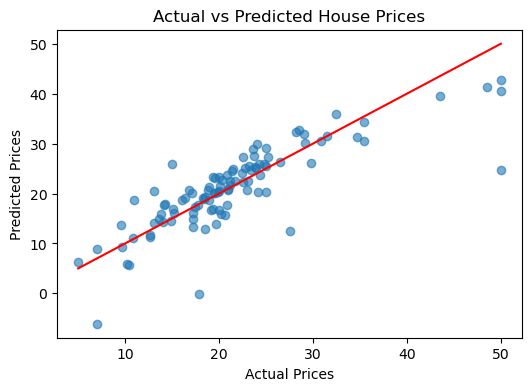

In [266]:
#visualize ACTUAL vs PREDICTED

plt.figure(figsize=(6,4))
plt.scatter(y_test,y_pred,alpha=0.6,colo)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red')
plt.show()